1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

In [36]:
#author Federico Pilotto 2107076
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

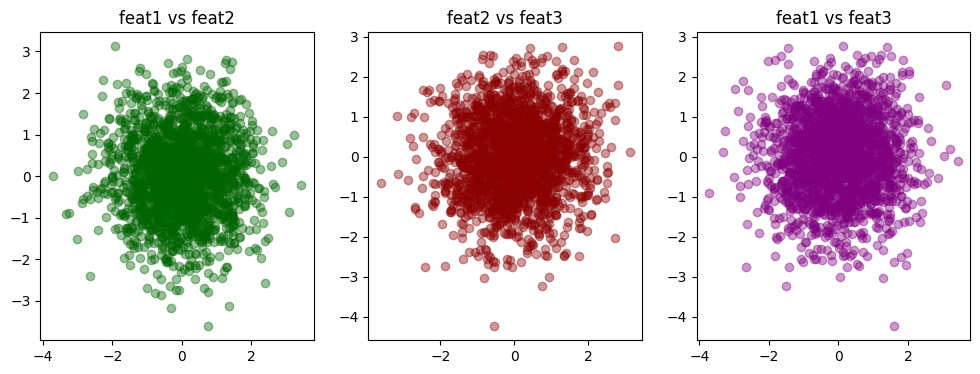

In [37]:
#creating the dataframe
df = pd.read_csv('data/regression_generated.csv')

f1 = df.features_1
f2 = df.features_2
f3 = df.features_3

fig, axs = plt.subplots(1, 3,figsize=(12,4))
axs[0].set_title('feat1 vs feat2')
axs[1].set_title('feat2 vs feat3')
axs[2].set_title('feat1 vs feat3')

axs[0].scatter(f1, f2, alpha=0.4, c='darkgreen')
axs[1].scatter(f2, f3, alpha=0.4, c='darkred')
axs[2].scatter(f1, f3, alpha=0.4, c='purple')
plt.show()


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

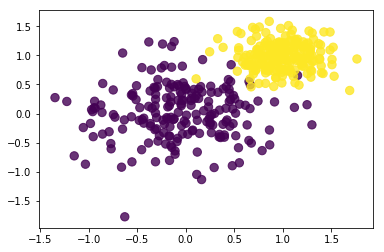

In [38]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

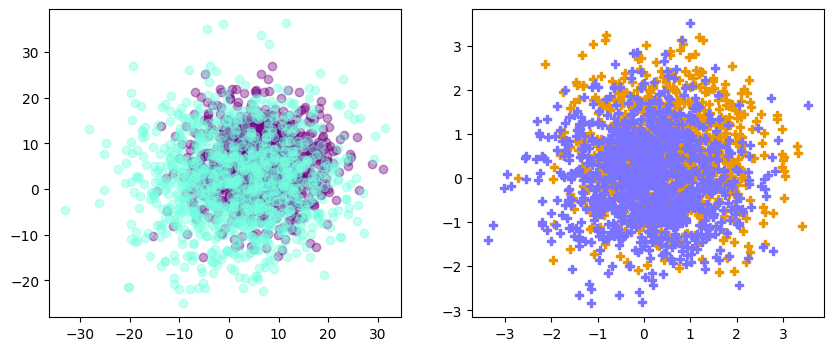

In [39]:
#it returns a tupla with axis x and y respectevly in pos 0 and pos 1
def normal_distribution(mu, sigma, size):
    x = np.random.normal(mu, sigma, size)
    y = np.random.normal(mu, sigma, size)
    return [x, y]

d1 = normal_distribution(6, 7, 1000)
d2 = normal_distribution(2, 10, 1000)

d3 = normal_distribution(0.5, 1, 1000)
d4 = normal_distribution(0, 1, 1000)

fig, axs = plt.subplots(1, 2,figsize=(10,4))
axs[0].scatter(d1[0], d1[1], alpha=0.4, c='#710082')
axs[0].scatter(d2[0], d2[1], alpha=0.4, c='#73ffe1')

axs[1].scatter(d3[0], d3[1], c='#eb9800', marker='P')
axs[1].scatter(d4[0], d4[1], c='#7a73ff', marker='P')
plt.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

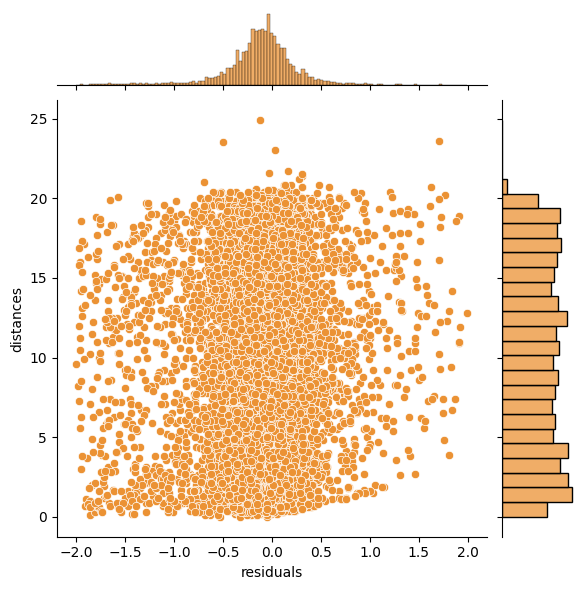

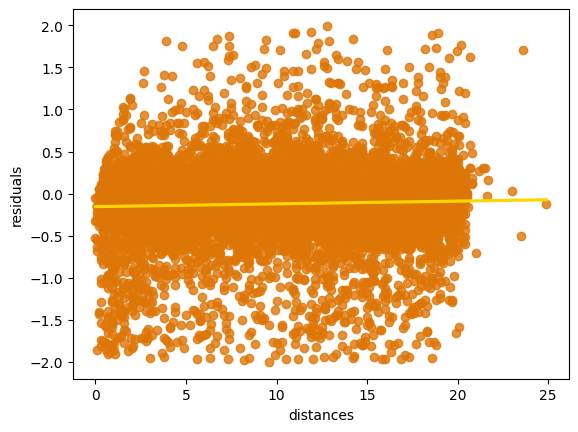

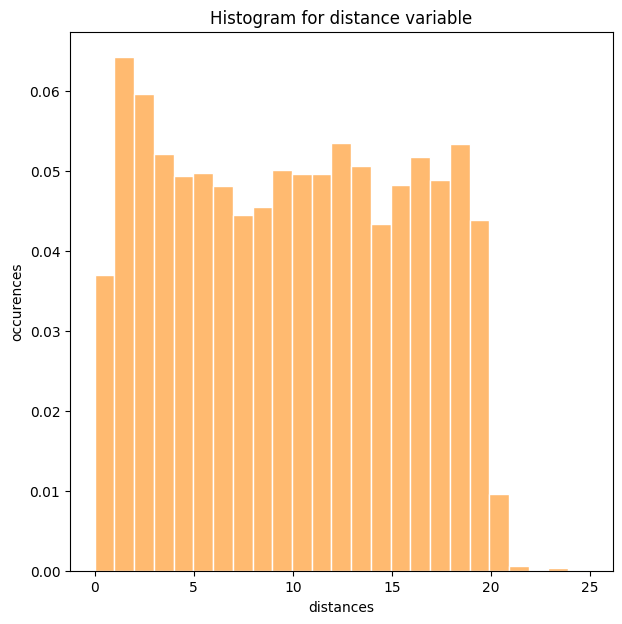

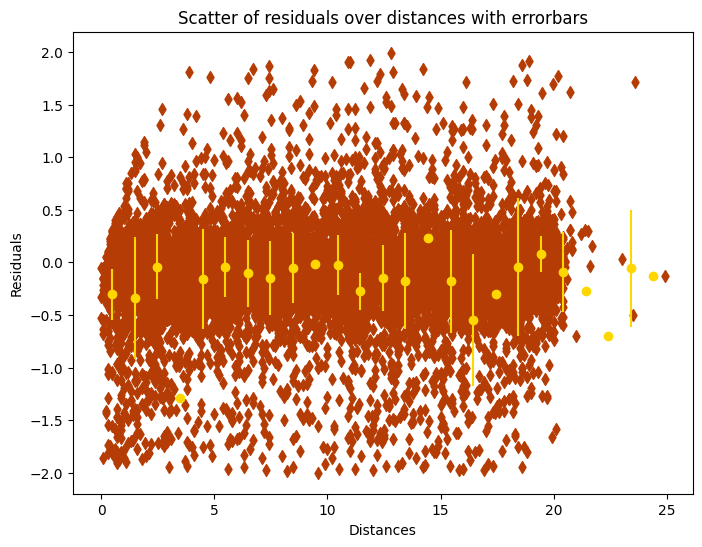

In [40]:
dataFile = 'data/residuals_261.pkl'
data = pd.read_pickle(dataFile)
df = pd.DataFrame(data.tolist())

df = df[abs(df['residuals']) < 2]
sns.jointplot(data=df, x='residuals', y='distances', color='#eb9234')
plt.show()

#linear regression plot
sns.regplot(data=df, x='distances', y='residuals', scatter_kws={'color': '#de7607'}, line_kws={'color': 'gold'})
plt.show()

#Histogram for distance variable
fig = plt.figure(figsize=(7,7))
n, edges, patches = plt.hist(df['distances'], bins=25, ec='white',density=True, color='#ffba70')

plt.title('Histogram for distance variable')
plt.xlabel('distances')
plt.ylabel('occurences')
plt.show()

# Calculate bin centers
x = (edges[:-1] + edges[1:]) / 2


#the mean of the residual estimated for each bin
y = np.array(df.groupby('distances')['residuals'].mean(), dtype='float')
mask = np.linspace(0, len(y)-1, 25, dtype='int')
y = y[mask]

#the standard deviation of the residual estimated for each bin
err_y = np.array(df.groupby('distances')['residuals'].std(), dtype='float')
err_y = err_y[mask]

fig = plt.figure(figsize=(8, 6))
plt.scatter(x=df['distances'],y=df['residuals'], marker='d', color='#b53c04')
plt.errorbar(x, y, err_y, fmt='o', color='gold')
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.title('Scatter of residuals over distances with errorbars')
plt.show()




4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


/var/folders/3z/zbtjjgm96cdbpj5qjyjcgxl80000gn/T/ipykernel_797/174390741.py:11: RuntimeWarning: divide by zero encountered in divide
  err = 1 / np.sqrt(n)


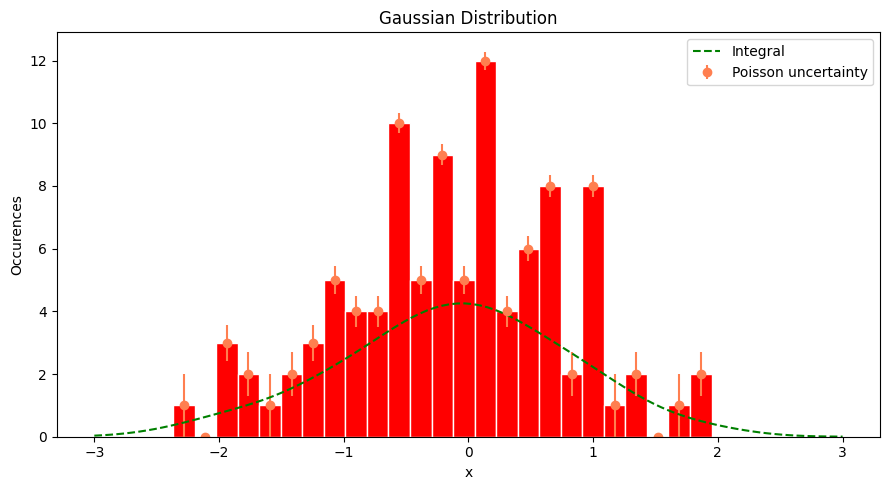

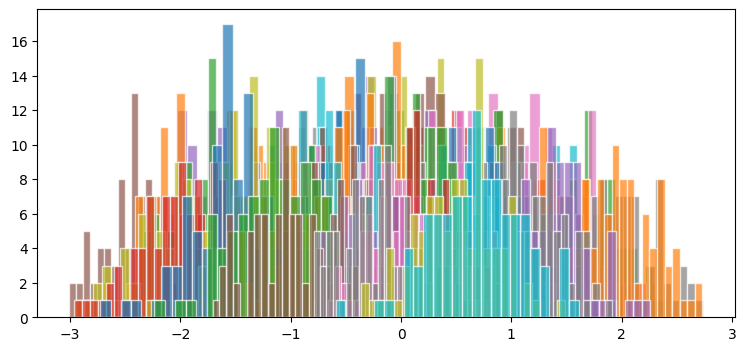

In [41]:
mu = 0
sigma = 1
size = 100
x = np.random.normal(mu, sigma, size)

#plot the histogram of the gaussian distribution
plt.figure(figsize=(9,5))
n, edges, patches = plt.hist(x, bins=25, ec='white',color='red')

edges = (edges[:-1] + edges[1:]) / 2
err = 1 / np.sqrt(n)
plt.errorbar( edges, n, err, fmt = 'o', color='coral', label= "Poisson uncertainty")

std = 1.06 * x.std() * (np.size(x))**(-0.2)
new_x = np.array([np.random.normal(x[i], std, size) for i in range(len(x))], dtype='float').reshape(100,100)


normals = np.zeros((100,100))
ascissa, step= np.linspace(-3, 3, 100, retstep=True)

for i in range(len(x)):
    normals[i,:] = scipy.stats.norm.pdf(ascissa, x[i], std)

#integral
sum_n = np.sum(normals, axis=0)

integral1 = scipy.integrate.trapz(sum_n, ascissa)
integral2 = np.sum(0.1*n)



factor = sum_n * (integral2 / integral1)
plt.plot(ascissa, factor, linestyle='--',color = "green", label='Integral')

#draw the histogram
plt.title('Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('Occurences')
plt.tight_layout()
plt.legend()
plt.show()

#plot all the gaussian distribution
plt.figure(figsize=(9,4))
for i in range(len(x)):
    plt.hist(new_x[i,:], bins=25, ec='white',alpha=0.7)

plt.show()
